### Project Overview
#### You project is to try to predict the daily returns for the Volatility market (more specifically UVXY)
#### What we are interested in is , if here there is any predictibility from the daily returns of securties in the S&P that are at least 50% inversely coorelated to UVXY on the daily retruns of UVXY

### Project aproach
- Gather data for the securties that are 50% inverely coorelatied to UVXY and get the daily returns for a 5 year period
- get th edaily returns for Uvxy
- Convert the  daily returns for UVXY to one hot encoding(0, 1
- run a PCA on the features to minimize the dimansions of the data if many
- use an ANN to classify the target

## importing libraries

In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns

#### Improting S&P data 

In [8]:
s_and_p = pd.read_csv("resources/companies.csv")

In [11]:
tickers = list(s_and_p["Symbol"])

In [12]:
tickers.append("UVXY")

In [13]:
len(tickers)

506

### Getting securities data

In [14]:
df = pd.DataFrame()

In [15]:
passed = []
failed = []
for x in tickers:
    try:
        df[x] = web.DataReader(x, data_source="yahoo", start="2015-1-1")["Adj Close"]
        passed.append(x)
    except(OSError,KeyError):
        failed.append(x)

In [18]:
##df.to_csv("resources/s&p_2015on.csv")

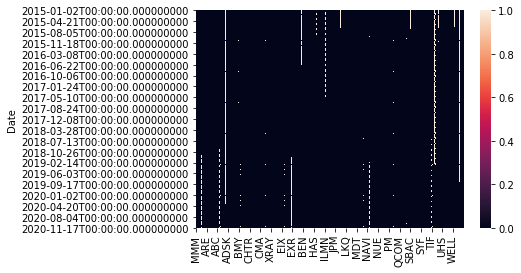

In [17]:
sns.heatmap(df.isnull())

In [19]:
df.isnull().sum().sort_values(ascending = False)

PX      1505
ARNC    1320
XL      1174
FOX     1054
FOXA    1053
        ... 
NLSN       0
NKE        0
NI         0
JWN        0
MMM        0
Length: 475, dtype: int64

### Getting the returns for the data 

In [20]:
df_returns = df.pct_change()

In [29]:
UVXY_50inverse = df_returns.corrwith(df_returns["UVXY"]).sort_values().head(50).index

In [34]:
UVXY_50inverse = list(UVXY_50inverse)

## Appending UVXY returns to this list 
- Since this will be our target 

In [38]:
UVXY_50inverse.append("UVXY")

### Above is the top 50 companies that are inversely coorelate to UVXY
- Lets set the Data frame that we need to work with these companies

In [59]:
working_DF = df_returns[UVXY_50inverse]

In [60]:
working_DF

,APH,V,MSFT,ACN,MS,BLK,MA,TXN,TEL,GOOGL,...,FIS,UNP,ETN,ROP,GPN,AAPL,SWKS,PKI,UVXY,UVXY
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018270,-0.022074,-0.009196,-0.016885,-0.031259,-0.025874,-0.028128,-0.015520,-0.019471,-0.019054,...,-0.017305,-0.033808,-0.041366,-0.029307,-0.016987,-0.028172,-0.016230,-0.023588,0.143855,0.143855
2015-01-06,-0.012723,-0.006444,-0.014677,-0.007213,-0.028800,-0.015539,-0.002161,-0.016524,-0.012109,-0.024679,...,-0.001304,-0.020681,-0.011210,-0.013944,-0.011478,0.000094,-0.031887,-0.009059,0.044556,0.044556
2015-01-07,0.017119,0.013398,0.012705,0.020989,0.014278,0.021164,0.015555,0.017961,0.030070,-0.002941,...,0.016490,0.005524,0.002951,0.010223,0.011739,0.014022,0.016468,0.006095,-0.063295,-0.063295
2015-01-08,0.019478,0.013413,0.029418,0.015249,0.014889,0.011679,0.015555,0.016316,0.020149,0.003484,...,0.014134,0.037484,0.035770,0.006747,0.069239,0.038422,0.045365,0.025163,-0.123026,-0.123026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-10,-0.006732,-0.000387,-0.003897,-0.002872,0.001212,-0.007725,0.002309,0.003857,-0.017858,0.005344,...,0.003688,-0.005619,0.016106,-0.004657,-0.005165,-0.004558,0.013012,0.010988,0.023976,0.023976
2021-02-11,0.009671,0.022026,0.006877,0.007901,-0.008207,-0.002406,0.025912,0.027873,0.008854,0.001088,...,0.013422,0.018329,0.014537,-0.004579,-0.012807,-0.001920,0.018727,0.010053,-0.033171,-0.033171
2021-02-12,0.024964,-0.003323,0.002045,-0.005792,0.012073,0.002148,-0.005454,0.002343,0.016927,0.003007,...,0.003330,0.028616,0.003643,-0.009975,-0.012322,0.001776,0.006587,0.012576,-0.049445,-0.049445


### lets one hot encode UVXY Target (0, and 1s) 

In [61]:
def setEncoding(value):
    if value < 0:
        return 0
    else:
        return 1

## Applying function to target column

In [62]:
working_DF.dropna(inplace=True)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
working_DF.drop("UVXY", axis=1, inplace=True)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
working_DF["UVXY"] = df_returns["UVXY"]

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
working_DF["UVXY"] = working_DF["UVXY"].apply(lambda x: setEncoding(x))

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
working_DF

,APH,V,MSFT,ACN,MS,BLK,MA,TXN,TEL,GOOGL,...,FISV,FIS,UNP,ETN,ROP,GPN,AAPL,SWKS,PKI,UVXY
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.018270,-0.022074,-0.009196,-0.016885,-0.031259,-0.025874,-0.028128,-0.015520,-0.019471,-0.019054,...,-0.011328,-0.017305,-0.033808,-0.041366,-0.029307,-0.016987,-0.028172,-0.016230,-0.023588,1
2015-01-06,-0.012723,-0.006444,-0.014677,-0.007213,-0.028800,-0.015539,-0.002161,-0.016524,-0.012109,-0.024679,...,0.001003,-0.001304,-0.020681,-0.011210,-0.013944,-0.011478,0.000094,-0.031887,-0.009059,1
2015-01-07,0.017119,0.013398,0.012705,0.020989,0.014278,0.021164,0.015555,0.017961,0.030070,-0.002941,...,0.013593,0.016490,0.005524,0.002951,0.010223,0.011739,0.014022,0.016468,0.006095,0
2015-01-08,0.019478,0.013413,0.029418,0.015249,0.014889,0.011679,0.015555,0.016316,0.020149,0.003484,...,0.020328,0.014134,0.037484,0.035770,0.006747,0.069239,0.038422,0.045365,0.025163,0
2015-01-09,-0.005750,-0.014823,-0.008405,-0.001112,-0.016271,-0.011856,-0.012744,0.000560,-0.005910,-0.012211,...,-0.002905,-0.003326,-0.017936,-0.012409,-0.005519,0.008257,0.001072,-0.001617,-0.010227,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-10,-0.006732,-0.000387,-0.003897,-0.002872,0.001212,-0.007725,0.002309,0.003857,-0.017858,0.005344,...,-0.035522,0.003688,-0.005619,0.016106,-0.004657,-0.005165,-0.004558,0.013012,0.010988,1
2021-02-11,0.009671,0.022026,0.006877,0.007901,-0.008207,-0.002406,0.025912,0.027873,0.008854,0.001088,...,-0.008591,0.013422,0.018329,0.014537,-0.004579,-0.012807,-0.001920,0.018727,0.010053,0
2021-02-12,0.024964,-0.003323,0.002045,-0.005792,0.012073,0.002148,-0.005454,0.002343,0.016927,0.003007,...,0.013920,0.003330,0.028616,0.003643,-0.009975,-0.012322,0.001776,0.006587,0.012576,0


### Setting up the data for training

In [67]:
X = working_DF.drop("UVXY", axis=1).values
y = working_DF["UVXY"].values

### Training testing and splitting

In [68]:
from tensorflow.keras.models import train_test_split

ImportError: Traceback (most recent call last):
  File "/Users/admin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/Users/admin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/Users/admin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/Users/admin/opt/anaconda3/lib/python3.7/imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "/Users/admin/opt/anaconda3/lib/python3.7/imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: dlopen(/Users/admin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so, 6): Symbol not found: _SecKeyCopyExternalRepresentation
  Referenced from: /Users/admin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/../libtensorflow_framework.2.dylib
  Expected in: /System/Library/Frameworks/Security.framework/Versions/A/Security
 in /Users/admin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/../libtensorflow_framework.2.dylib


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.